In [3]:
%pylab inline
import re
import math
import string
from collections import Counter
from __future__ import division

Populating the interactive namespace from numpy and matplotlib


In [6]:
TEXT= file('big.txt').read()
len(TEXT)

6488666

In [8]:
# lets break the text into tokens. 
def tokens(text):
    "List all the word tokens in a text. Normlaize to lowercase"
    return re.findall('[a-z]+',text.lower())


In [9]:
tokens('this is a test, 1, 2 3, > This is')

['this', 'is', 'a', 'test', 'this', 'is']

In [12]:
WORDS=tokens(TEXT)
len(WORDS)

1105285

In [14]:
# Print first 10 words:
print (WORDS[:10])

['the', 'project', 'gutenberg', 'ebook', 'of', 'the', 'adventures', 'of', 'sherlock', 'holmes']


In [15]:
# Bag of Words model 
def sample(bag, n=10):
    "Sample a random n-word sentence from the model described by bag of words"
    return ' '.join(random.choice(bag) for _ in range(n))

    

In [17]:
sample(WORDS)

'in intentions of stick which was is the bearing form'

In [20]:
# another representation of bag of words is a coutner, which is a dictionary. 
Counter(tokens("Is this a text?  It is  test!!"))

Counter({'a': 1, 'is': 2, 'it': 1, 'test': 1, 'text': 1, 'this': 1})

In [22]:
COUNTS=Counter(WORDS)
print COUNTS.most_common(10)

[('the', 80030), ('of', 40025), ('and', 38313), ('to', 28766), ('in', 22050), ('a', 21155), ('that', 12512), ('he', 12401), ('was', 11410), ('it', 10681)]


In [23]:
for w in tokens('the rare and neverbeforeseen words'):
    print COUNTS[w], w

80030 the
83 rare
38313 and
0 neverbeforeseen
460 words


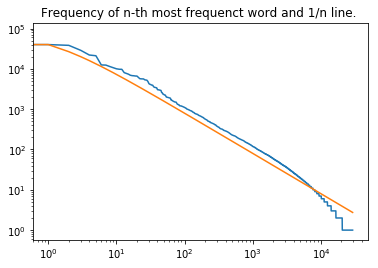

In [29]:
# Zipf Law, the nth most frequent word appears with a frequency of about 1/n of the most frequent word. 
M= COUNTS['the']
#print M
yscale('log'); xscale('log'); title("Frequency of n-th most frequenct word and 1/n line. ")
plot([c for (w,c) in COUNTS.most_common()])
plot([M/i for i in range (1, len(COUNTS)+1)])

# Task : Spelling Correction
Given a word w, find the most common correction c=correct(w)
<b> Approach </b> : Try all candidate words c that are known words that are near w. Choose the most likely one. 




In [31]:
def correct(word):
    "Find the best spelling correction for this word. "
    # prefer edit distance 0, then 1, then 2 ; otherwise default to word itself
    candidates = (known(edits0(word)) or 
                  known(edits1(word)) or 
                  known (edits2(word)) or 
                  [word])
    return max(candidates, key=COUNTS.get)            
    

In [32]:
def known(words):
    "Returns the subset of words that are actually in the dictionary"
    return {w for w in words if w in COUNTS}

def edits0(word):
    "Return all strings that are zero edits away from word (i.e. just word itself)"
    return {word}

def edits2(word):
    "Returns all strings that are two edits away from this word. "
    return {e2 for e1 in edits1(word) for e2 in edits1(e1)}

In [57]:
alphabet = 'abcdefghijklmnopqrstuvwxyz'

def edits1(word="test"):
    "returns all strings that are one edit away from this word. "
    pairs = splits(word)
    deletes = [a+b[1:]    for (a,b) in pairs if b]
    transposes = [a+b[1] + b[0] + b[2:]  for (a,b) in pairs if len(b) >1]
    replaces = [a +c + b[1:] for (a,b) in pairs for c in alphabet]
    inserts = [a+c+b  for (a,b) in pairs for c in alphabet]
    
    return set(deletes+transposes+replaces+inserts)
    

def splits(word):
    "return a list of all possible (first, rest) pairs that comprise word. "
    return [(word[:i], word[i:]) for i in range(len(word)+1)]
    

   

In [63]:
print edits0('wird')


set(['wird'])


In [64]:
print edits1('wird')

set(['wiwrd', 'jird', 'wiid', 'wirj', 'wiprd', 'rird', 'wkird', 'wiqrd', 'wirdt', 'wrird', 'wisrd', 'zwird', 'wiqd', 'wizrd', 'wirs', 'wrd', 'wirdq', 'tird', 'wrrd', 'wzrd', 'wiad', 'nird', 'wirsd', 'wixd', 'wxird', 'lird', 'eird', 'wmird', 'wihd', 'wirp', 'lwird', 'wirhd', 'wirzd', 'widrd', 'wxrd', 'ewird', 'wirkd', 'hwird', 'wipd', 'wirnd', 'uwird', 'wirz', 'mwird', 'wjrd', 'wirjd', 'wirrd', 'wirdd', 'wsird', 'wirdb', 'wcrd', 'xwird', 'wdird', 'wibrd', 'wikd', 'wiryd', 'kwird', 'gird', 'wtird', 'wbrd', 'nwird', 'wlrd', 'wgird', 'wmrd', 'wirf', 'wirg', 'wird', 'wire', 'wirb', 'wirc', 'wira', 'wkrd', 'wiro', 'wirl', 'wirm', 'iird', 'wirk', 'wirh', 'wiri', 'wirv', 'wirw', 'wirt', 'wiru', 'wirr', 'wicd', 'cird', 'wirq', 'wirqd', 'wizd', 'wnird', 'ird', 'bird', 'wirx', 'wiry', 'wvrd', 'bwird', 'widr', 'wprd', 'wirad', 'wijd', 'wiurd', 'wirxd', 'uird', 'qwird', 'dird', 'wnrd', 'wjird', 'gwird', 'whrd', 'wtrd', 'woird', 'rwird', 'wurd', 'wijrd', 'witrd', 'wwrd', 'wivrd', 'dwird', 'vwird', '

In [70]:
#print edits2('wird')
print len(edits1('wird'))
print len(edits2('wird'))

234
24254


In [71]:
map(correct, tokens('Speling errurs in somethink. Whutever; unusuel misteakes everyware?'))

['spelling',
 'errors',
 'in',
 'something',
 'whatever',
 'unusual',
 'mistakes',
 'everywhere']

In [76]:
def correct_text(text):
    "Correct all the words within a text, returns corrected text"
    return re.sub('[a-zA-Z]+', correct_match,text)

def correct_match(match):
    "Spell-correct word in match, and preserve case : upper/lower/title"
    word=match.group()
    return case_of(word) (correct (word.lower()))

def case_of (text):
    "returns the case-function appropriate for text: upper, lower, title, or just str"
    return (str.upper if text.isupper() else
            str.lower if text.islower() else
            str.title if text.istitle() else
            str)


In [77]:
map(case_of, ['UPPER', 'lower', 'Title', 'CamelCase'])



[<method 'upper' of 'str' objects>,
 <method 'lower' of 'str' objects>,
 <method 'title' of 'str' objects>,
 str]

In [79]:
correct_text('Spelling errurs IN Somethink.')

'Spelling errors IN Something.'

In [80]:
# From count to probablities

In [102]:
def pdist(counter):
    "Make a probability disturbition, given evidence from a Counter"
    N=sum(counter.values())
    return lambda x: counter[x]/N
Pword=pdist(COUNTS)


In [103]:
for w in tokens("the is most common word"):
    print Pword(w), w

0.0724066643445 the
0.00884296810325 is
0.000821507574969 most
0.00025966153526 common
0.000269613719538 word


In [104]:
#Memoization function
def memo(f):
    cache={}
    def fmemo(*args):
        if args not in cache:
            cache[args]=f(*args)
        return cache[args]
    fmemo.cache=cache
    return fmemo


In [105]:
max(len(w) for w in COUNTS)

18

In [106]:
def splits(text,start=0, L=20):
    "returns a list of all (first,rest) paris ; start <=len(first)<=L"
    return [(text[:i], text[i:]) for i in range(start,min(len(text),L)+1)]
    

In [107]:
print splits('word')

[('', 'word'), ('w', 'ord'), ('wo', 'rd'), ('wor', 'd'), ('word', '')]


In [123]:
def Pwords(words):
    "Probability of words, assuming each word is independent of others."
    return product(Pword(w) for w in words)

def product(nums):
    "Multiply the numbers together.  (Like `sum`, but with multiplication.)"
    result = 1
    for x in nums:
        result *= x
    return result

In [124]:
@memo
def segment(text):
    "return a list of words that is the most probable segmentation of text. "
    if not text:
        return []
    else : 
        candidates=([first] + segment(rest) for (first , rest) in splits(text,1))
        return max(candidates, key=Pwords)

In [125]:
segment('choosespain')

['choose', 'spain']

In [126]:
decl = ('wheninthecourseofhumaneventsitbecomesnecessaryforonepeople' +
        'todissolvethepoliticalbandswhichhaveconnectedthemwithanother' +
        'andtoassumeamongthepowersoftheearththeseparateandequalstation' +
        'towhichthelawsofnatureandofnaturesgodentitlethem')

In [127]:
print(segment(decl))

['when', 'in', 'the', 'course', 'of', 'human', 'events', 'it', 'becomes', 'necessary', 'for', 'one', 'people', 'to', 'dissolve', 'the', 'political', 'bands', 'which', 'have', 'connected', 'them', 'with', 'another', 'and', 'to', 'assume', 'among', 'the', 'powers', 'of', 'the', 'earth', 'the', 'separate', 'and', 'equal', 'station', 'to', 'which', 'the', 'laws', 'of', 'nature', 'and', 'of', 'natures', 'god', 'entitle', 'them']


In [144]:
# Big data for ngrams
def load_counts(filename, sep='\t'):
    "returns a counter initialized from key-value pairs one on each line of filename"
    C=Counter()
    for line in open(filename):
        line=line.strip()
        key,count=line.split(sep)
        C[key]=int(count)
    return C

In [147]:
COUNTS1=load_counts('count_1w.txt')
COUNTS2=load_counts('count_2w.txt')

#print COUNTS2.most_common(30)
#print COUNTS1.most_common(30)


P1w=pdist(COUNTS1)
P2w=pdist(COUNTS2)




In [149]:
P1w('hello')

5.6043230101150934e-05

In [159]:

def pWords(words):
    "Probability of word sequence assuming each word is independent of other words"
    return product(P1w(w) for w in words)

def cPword(word,prev):
    "conditional prob of word given prev word. "
    bigram= prev + ' ' + word
    if P2w(bigram) > 0 and P1w(prev) > 0:
        return P2w(bigram)/P1w(prev)
    else:
        # average the back-ff value and zero
        return P1w(word)/2
def Pwords2(words,prev='<S>'):
    return product(cPword(w,(prev if i==0 else words[i-1])) for (i,w) in enumerate(words) )


In [160]:
print Pwords2(tokens('this is a test'))

6.41367629438e-08


In [170]:
# lets create segment2 function which selects best function on candidate. 
@memo
def segment2(text, prev="<S>"):
    if not text:
        return []
    else :
        candidates=([first] + segment2(rest,first) for (first,rest) in splits(text,1))
        return max(candidates , key= lambda words: Pwords2(words,prev))
        

In [173]:
print segment2('choosespain')
print segment2('speedofart')


['choose', 'spain']
['speed', 'of', 'art']


In [176]:
import random
n=100
seen=set()
for i in range(n):
    throw=random.randint(0,7)
    seen.add(throw)
    if(len(seen==6)):
        

21
